In [2]:
import requests
from bs4 import BeautifulSoup

In [51]:
def article_crawler(url):
    """
    Input:
           url -> https://www.ptt.cc/bbs/NBA/M.1493020274.A.8BA.html
    
    Output:
           article_dict -> {'url': "https://www.ptt.cc/bbs/NBA/M.1493020274.A.8BA.html",
                            'title': "Re: [討論] 看完雷霆火箭G4，鬍龜隊友真的差不多嗎?",
                            'author': "griefman (小蟻天)",
                            'tm': "Mon Apr 24 15:51:07 2017"
                            'board': "NBA",
                            'ip': '127.0.0.1,
                            'content': "※ 引述《adonistao (三部五十)》之銘言：
                                        : ※ 引述《Turtle100 (龜龜100)》之銘言：
                                        : : 差很多
                                        : : 先說結論
                                        : : 跟鬍子打球:
                                        : : 你覺得火箭每個人都是巨頭 。
                                        : : 跟西河打球:.............................",
                            'push': [
                                      {'type': '推',
                                      'contente': '為啥雷霆隊友全面雜魚化?',
                                      'tm': '04/24 15:54'},
                                      {'type': '推',
                                      'contente': '為啥雷霆隊友全面雜魚化?',
                                      'tm': '04/24 15:54'},
                                      {'type': '推',
                                      'contente': '為啥雷霆隊友全面雜魚化?',
                                      'tm': '04/24 15:54'},
                                      {'type': '推',
                                      'contente': '為啥雷霆隊友全面雜魚化?',
                                      'tm': '04/24 15:54'},
                            ]}
                            
    Note:
            文章內容，與其用精準的selector，不如把不相干的（或是已經爬下來的）Tag給刪掉。
            https://www.crummy.com/software/BeautifulSoup/bs4/doc/#decompose
    
    """
    article_dict = {}
    
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'lxml')
    meta_lines = soup.select('div.article-metaline > span')
    article_dict['author'] = meta_lines[1].text
    article_dict['title']  = meta_lines[3].text
    article_dict['tm']     = meta_lines[5].text
    article_dict['board']  = soup.select('div.article-metaline-right > span')[1].text
    
    pushs = []
    for push in soup.select('div.push'):
        push_dict = {}
        push_dict['push_type']    = push.select_one('.push-tag').text.strip()
        push_dict['push_author']  = push.select_one('.push-userid').text.strip()
        push_dict['push_content'] = push.select_one('.push-content').text.replace(': ', '')
        push_dict['push_tm']      = push.select_one('.push-ipdatetime').text.strip()
        pushs.append(push_dict)
    
    article_dict['pushs'] = pushs
    
    for trash in soup.select('div.article-metaline > span') + soup.select('div.article-metaline-right > span') + soup.select('div.push'):
        trash.decompose()
        
    content_raw = soup.select_one('#main-content').text.strip()
    article_dict['ip']      = content_raw.split(', 來自: ')[1].split('\n※ 文章網址:')[0]
    article_dict['content'] = content_raw.split('\n※ 發信站')[0]
    
    return article_dict

In [47]:
nba_data = article_crawler("https://www.ptt.cc/bbs/NBA/M.1493231113.A.172.html")

In [48]:
nba_data['tm']

'Thu Apr 27 02:25:07 2017'

In [49]:
nba_data['title']

'[外絮] NBA算你們走運 - Dion Waiters'

In [50]:
nba_data

{'author': 'yiyi7443 (不捨)',
 'board': 'NBA',
 'content': "The NBA Is Lucky I’m Home Doing Damn Articles\n\n日\u3000\u3000期：APR 25 2017\n作\u3000\u3000者：Dion Waiters(現役邁阿密熱火隊後衛)\n原文連結：\nhttps://www.theplayerstribune.com/dion-waiters-miami-heat-nba-is-lucky/\nhttp://i.imgur.com/kMFQmKm.jpg\n\nY'all seen Casino, right?\n\n你們都看過《賭國風雲》這部電影吧？\n\nYou know, the one with Robert De Niro and Joe Pesci in Vegas? Anyway — that\none.\n\n勞勃狄尼洛和喬派西在拉斯維加斯的那部就是了。\n\nIf you want to know what it’s like to meet Pat Riley, you need to watch that\nmovie.\n\n如果你想知道和帕特萊利會面的感覺，一定要看這部電影。\n\nWhen I heard that Miami was interested in me this summer, I wasn’t really\nseeing it at first. Nothing against the Heat, but I didn’t know how I’d fit\nthere.\n\n當我知道邁阿密對我有意思的時候，我一開始沒什麼興趣。\n不是對熱火有意見，只是不曉得自己適不適合那裡。\n\nThen I met Pat Riley.\n\n然後我見到了帕特萊利。\n\nI walked into his office and … damn. The hair was slicked back, and he was\nwearing one of those suits of his, you know, real O.G., looking like a\nmillion bucks. Behind him,

In [52]:
# Javascrpt rendered websites....

In [53]:
res = requests.get('https://www.airbnb.com.tw/')

In [54]:
res

<Response [200]>

In [56]:
with open('./airbnb.html', 'w') as f:
    f.write(res.text)

In [93]:
# honestbee
from lib import toolbox
headers = toolbox.gen_header("""Accept:application/vnd.honestbee+json;version=2
Accept-Encoding:gzip, deflate, sdch, br
Accept-Language:en
Cache-Control:no-cache
Connection:keep-alive
Cookie:ajs_group_id=null; ajs_anonymous_id=%226ac7567b-76fd-4050-9aa9-bc9543845fbb%22; ajs_user_id=%226ac7567b-76fd-4050-9aa9-bc9543845fbb%22; ab.storage.sessionId.36d2d68f-6109-4fba-baa2-17f85da40cd5=%7B%22g%22%3A%22abab41b5-ed84-c5db-c152-faf0b087f13c%22%2C%22e%22%3A1493261233665%2C%22c%22%3A1493259433665%2C%22l%22%3A1493259433665%7D; ab.storage.deviceId.36d2d68f-6109-4fba-baa2-17f85da40cd5=%7B%22g%22%3A%2290381acb-7bfa-0249-d8f8-e228102b68a8%22%2C%22c%22%3A1493259433670%2C%22l%22%3A1493259433670%7D; _uetsid=_uetc75a543d; _TUCI_T=sessionNumber+17283&pageView+17283; _TUCS=1; _TUCI=sessionNumber+1000&ECId+727&hostname+honestbee.tw&pageView+1000&Member; _omappvp=true; _omappvs=true; _ga=GA1.2.686160775.1493259433; om-531426=true
Host:honestbee.tw
Pragma:no-cache
Referer:https://honestbee.tw/en/
User-Agent:Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.81 Safari/537.36""")


res = requests.get("https://honestbee.tw/api/api/stores/547?sort=ranking&pageSize=48&page=2",
                  headers=headers)

In [94]:
res

<Response [200]>

In [96]:
res.json()['products']

[{'alcohol': False,
  'amountPerUnit': '1.0',
  'barcode': None,
  'countryOfOrigin': None,
  'currency': 'TWD',
  'description': None,
  'descriptionHtml': None,
  'id': 1075206,
  'imageUrl': 'https://assets.honestbee.com/products/images/480/thomas-meat_88010018_88010018-1.jpg',
  'imageUrlBasename': 'thomas-meat_88010018_88010018-1.jpg',
  'normalPrice': '212.0',
  'nutritionalInfo': None,
  'packingSize': None,
  'previewImageUrl': 'https://assets.honestbee.com/products/images/480/thomas-meat_88010018_88010018-1.jpg',
  'price': '212.0',
  'productBrand': None,
  'productInfo': None,
  'promotionEndsAt': None,
  'promotionStartsAt': None,
  'size': '350 - 370 g',
  'slug': None,
  'soldBy': 'sold_by_item',
  'status': 'status_available',
  'tags': [],
  'title': 'Duck breast',
  'unitType': 'unit_type_item'},
 {'alcohol': False,
  'amountPerUnit': '300.0',
  'barcode': None,
  'countryOfOrigin': None,
  'currency': 'TWD',
  'description': None,
  'descriptionHtml': None,
  'id': 10

In [97]:
!pip install splinter

In [144]:
from splinter import Browser

browser = Browser('chrome')

url = "http://www.google.com"
# browser.visit(url)
# browser.fill('q', 'ianchenhq\n')
# if browser.is_text_present('ianchenhq.com'):
#     print("Yes, the blog website was found!")
# else:
#     print("No, it wasn't found... We need to improve our SEO techniques")

In [141]:
browser.visit("http://google.com")

In [142]:
search_input = browser.find_by_xpath('//*[@id="lst-ib"]')[0]

In [115]:
type(search_input)

splinter.driver.webdriver.WebDriverElement

In [118]:
search_input.fill('ianchenhq\n')

In [119]:
browser.is_text_present('https://ianchenhq.com')

True

In [121]:
blog_link = browser.find_by_xpath('//*[@id="rso"]/div/div/div[6]/div/div/h3/a')[0]

In [122]:
type(blog_link)

splinter.driver.webdriver.WebDriverElement

In [123]:
blog_link.click()

In [127]:
browser.execute_script('window.scrollTo(0, document.body.scrollHeight)')

In [130]:
browser.execute_script('window.scrollTo(0, 250)')

In [131]:
browser.screenshot('./ianchenhq.png')

'/var/folders/bv/x472ln0x6fd0vl_1y4v8gkm00000gn/T/ianchenhq.pngscmvb5as.png'

'<!DOCTYPE html><html xmlns="http://www.w3.org/1999/xhtml" itemscope="" itemtype="http://schema.org/WebPage" lang="zh-TW"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image" /><link href="/images/branding/product/ico/googleg_lodp.ico" rel="shortcut icon" /><meta content="origin" id="mref" name="referrer" /><title>ianchenhq - Google 搜尋</title>   <script src="https://apis.google.com/_/scs/abc-static/_/js/k=gapi.gapi.en.DTPeBB_SvOA.O/m=gapi_iframes,googleapis_client,plusone/rt=j/sv=1/d=1/ed=1/rs=AHpOoo-J3J0yqNDMPVrmQT6j-SBFfGx8oA/cb=gapi.loaded_0" async=""></script><script>(function(){window.google={kEI:\'toQBWc30JYTs0gSY_KVY\',kEXPI:\'201761,1352863,1352993,1353095,3700266,3700347,3700405,4029815,4031109,4032677,4036527,4038214,4038394,4039268,4041776,4043492,4045096,4045293,4045839,4046904,4047140,4047454,4048347,4048980,4050750,4051887,4056126,4056682,4058016,4061666,4061980,4062724,4064468,4064796,4065786,4066197,4069829,4071757,4072270,
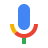
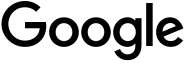

In [132]:
browser.html

In [133]:
soup = BeautifulSoup(browser.html, 'lxml')

In [137]:
for link in soup.select("h3.r > a"):
    print(link['href'])

https://www.facebook.com/ianchenhq/
https://www.facebook.com/Ianchenhq-194104291104385/info
https://github.com/ianchen06/ianchenhq
https://github.com/ianchen06
https://ianchenhq.com/about
https://ianchenhq.com/
https://ianchenhq.com/en/blog/linux-router-firewall-cont
https://certificatedetails.com/d2a716207cafd9959eeb430a19f2e0b9740ea8c7/58dd7ddef07154dfae77ba479a57749f/mx.ianchenhq.com
https://ianchen06.github.io/
http://www.crimeflare.com/cgi-bin/cfdom2.cgi/tw111.248.110


In [139]:
browser.quit()

In [146]:
with Browser('chrome') as browser:
    browser.visit('https://ianchenhq.com')
    blog = browser.html

In [147]:
blog

'<!DOCTYPE html><html xmlns="http://www.w3.org/1999/xhtml"><head>\n<meta charset="utf-8" />\n<meta name="viewport" content="width=device-width, initial-scale=1" />\n<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />\n<script type="text/javascript" async="" data-rocketsrc="https://ssl.google-analytics.com/ga.js" data-rocketoptimized="true"></script><script type="text/javascript">\n//&lt;![CDATA[\ntry{if (!window.CloudFlare) {var CloudFlare=[{verbose:0,p:0,byc:0,owlid:"cf",bag2:1,mirage2:0,oracle:0,paths:{cloudflare:"/cdn-cgi/nexp/dok3v=1613a3a185/"},atok:"eee958607c09c46741dda74bf3ea8b8e",petok:"6ff760d6429e7ca49dd23f8f69a6dfc9132b6975-1493273032-1800",zone:"ianchenhq.com",rocket:"a",apps:{}}];document.write(\'&lt;script type="text/javascript" src="//ajax.cloudflare.com/cdn-cgi/nexp/dok3v=85b614c0f6/cloudflare.min.js"&gt;&lt;\'+\'\\/script&gt;\');}}catch(e){};\n//]]&gt;\n</script><script type="text/javascript" src="//ajax.cloudflare.com/cdn-cgi/nexp/dok3v=85b614c0f6/cloudf

In [150]:
browser = Browser('chrome')

In [151]:
browser.visit("https://www.skyscanner.com.tw")

In [152]:
dest = browser.find_by_xpath('//*[@id="js-destination-input"]')[0]

In [153]:
dest.fill('Narita')

In [154]:
dept_date = browser.find_by_xpath('//*[@id="js-depart-input"]')[0]

In [156]:
dept_date = browser.find_by_xpath('//*[@id="category-flights"]/div[12]/div/div/div[2]/div/section/div[2]/table/tbody/tr[6]/td[1]/a')[0]

In [157]:
dept_date.click()

In [158]:
browser.find_by_xpath('//*[@id="js-return-input"]')[0]

In [159]:
browser.find_by_xpath('//*[@id="category-flights"]/div[13]/div/div/div[2]/div/section/div[1]/button[2]')[0].click()

In [161]:
browser.find_by_xpath('//*[@id="category-flights"]/div[13]/div/div/div[2]/div/section/div[2]/table/tbody/tr[1]/td[3]/a')[0].click()

In [164]:
browser.find_by_xpath('//*[@id="js-search-controls-container"]/form/section[2]/button/span[1]')[0].click()

In [165]:
browser.html

'<!DOCTYPE html><html xmlns="http://www.w3.org/1999/xhtml" class="skyscanner  legacy-button  bpk-no-touch-support" lang="zh-TW"><head><script src="https://pagead2.googlesyndication.com/pagead/osd.js"></script><script type="text/javascript" async="">var i = document.createElement(\'img\');    i.setAttribute(\'alt\', \'\');    i.setAttribute(\'height\', \'1\');    i.setAttribute(\'width\', \'1\');    i.setAttribute(\'style\', \'display: none;\');    i.setAttribute(\'src\', \'https://cm.g.doubleclick.net/pixel?google_nid=sojern__adx_open_bidder_seat&amp;google_hm=cf3uLX2nX6zewrYOGEAlrg&amp;google_ula=&amp;google_cm&amp;google_sc&amp;sjrn_id=ZxWmeRyWuIEuN84tP5oTR3_Pwxid7zBLTdBzpJ8YLhdm4-UEOrGZlbWJB-6bj9F_\');    document.body.appendChild(i);</script><script type="text/javascript" async="" src="//www.googleadservices.com/pagead/conversion_async.js"></script><script type="text/javascript" async="" src="https://pixel.sojern.com/partner/lq6MFTSoyPN6xuPc/fs?fa1=TPE&amp;fa2=NRT&amp;fd1=2017-04-3

In [166]:
soup = BeautifulSoup(browser.html, 'lxml')

In [167]:
soup.select('div.card-body')

[<div class="card-body clearfix"><div class="clearfix carrier"><div class="airline"><img alt="台灣虎航" onerror="__imgErrRemove__(this)" src="//logos.skyscnr.com/images/airlines/favicon/IT.png"/><span>台灣虎航</span></div></div><section class="card-main leg clearfix dept" data-id="0"><div class="big-airline"><img alt="台灣虎航" class="big" data-name="台灣虎航" onerror="__logoReplace__(this)" src="//logos.skyscnr.com/images/airlines/small/IT.png"/></div><div class="leg-details"><div class="depart"><span class="station-tooltip" data-id="17075"><span class="times">06:35</span><span class="stop-station" data-id="17075">TPE</span></span></div><div class="stops"><span class="duration">3 小時 10 分鐘</span><ul class="stop-line"><li class="stop-line"></li></ul><div class="leg-stops no-stops"><span class="leg-stops-green leg-stops-label">直飛 </span><span class="leg-stops-station"></span></div></div><div class="arrive"><span class="station-tooltip" data-id="14788"><span class="times">10:45</span><span class="stop-st

In [170]:
browser.find_by_xpath('//*[@id="day-section"]/div/div[3]/div[9]/div[2]/ul/li[6]/button')[0].click()

ElementDoesNotExist: no elements could be found with xpath "//*[@id="day-section"]/div/div[3]/div[9]/div[2]/ul/li[6]/button"

In [171]:
browser = Browser('chrome')

In [172]:
browser.visit('https://www.indiegogo.com')

In [174]:
browser.find_by_xpath('/html/body/div[2]/div/div/div[1]/div[1]/div[1]/nav/a[1]')[0].click()

In [175]:
browser.find_by_xpath('/html/body/div[2]/div/div/div[4]/div/explore-detail/div/div[2]/div[4]/div[1]/div/a[1]/div[2]/div[1]/div[2]')[0].click()